# Presynaptic multiple dataset statistical analysis

## Initialize

In [1]:
import sys
import importlib
import logging

import numpy as np
import scipy as sp

import pyto
import pyto.scripts.multi_dataset_util as util

# matplotlib 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['legend.loc'] = 'upper right'

%autosave 0
sys.version

Autosave disabled


'3.8.5 (default, Jul 28 2020, 12:59:40) \n[GCC 9.3.0]'

In [2]:
# import or reload work
import work
try:
    importlib.reload(work)
except AttributeError:
    reload(work)
work.main()
#import work as pp
from work import *

In [3]:
# Prevents mutplotlib DEBUG logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

### Development help
Should not be executed for standard work

In [ ]:
# enable reloading
%load_ext autoreload
%autoreload 2

In [ ]:
# stop autoreload 
%autoreload 0

In [ ]:
qtconsole

In [ ]:
# For making figures 
# for some reason need to repeat
%matplotlib
plt.rcParams['font.size'] = 16  
%matplotlib
plt.rcParams['font.size'] = 16

## Main concepts

Information presented in this section makes it easier to understand the analysis examples (next section). Furthremore, it helps making analysis taks beyond those show in the examples. 

### Data structures

Each data structure is concerned about one type of biological structures. The following are the main data structurs:
    
* sv: synaptic vesicles
* tether: tethers, filaments that link synaptic vesicles and the active zone membrane
* conn: connectors, filaments that interlink two synaptic vesicles
* layers: presynaptic intracellular regions parallel to the active zone membrane
* clust: clusters of synaptic vesicles and connectors
    
In addition, many specialized subsets of the above data are available, some of them are:

* sv_bins: list of data structures containing vesicles located at the proximal, indermediate and two distal zones relative to the active zone membrane (the zones are defined by distances specified in variable distance_bins)
* near_sv: synaptic vesicles located in the proximal region (the first bin of distance bins, default 0-45 nm)
* bulk_sv: synaptic vesicles located in all four zones together (default 0-250 nm)
* teth_sv: synaptic vesicles that have at least one tether
* conn_sv: synaptic vesicles that have at least one connector

Each data structure is a dict-like object:

In [4]:
sv

{'ctrl': <pyto.analysis.observations.Observations at 0x7f98645ec880>,
 'cond_x': <pyto.analysis.observations.Observations at 0x7f981f128760>,
 'cond_y': <pyto.analysis.observations.Observations at 0x7f981f08ea30>}

where keys are experimental group names and values are objects containing data for experimental groups. Each experimental group object contains data of all experiments belonging to the experimental group. 

### Properties

There are two types of individual elements of data structures (termed properties) 

#### 1) Scalar, or non-indexed properties

Scalar properties have only one value for each experiment. For example, each experiment (synapse) has one value for the number of synaptic vesicles, pixel size and presence of mitochodria, so thease are scalar values.

In [5]:
# Show scalar property values in Pandas.DataFrame form

# Only some properties are shown in order to make the pesentation more clear
df = near_sv.get_scalar_data()
df[['group', 'identifiers', 'az_surface_um', 'pixel_size', 'mitochondria', 'sv_file']]

,group,identifiers,az_surface_um,pixel_size,mitochondria,sv_file
0,ctrl,ctrl_209,0.079114,1.756,True,/some_path/segmentation/XY_2/tomo9_XY_2_ctrl/v...
1,ctrl,ctrl_204,0.083428,1.756,True,/some_path/segmentation/XY_2/tomo4_XY_2_ctrl/v...
2,ctrl,ctrl_114,0.028896,1.756,True,/some_path/segmentation/XY_1/tomo14_XY_1_ctrl/...
3,ctrl,ctrl_421,0.236856,1.756,True,/some_path/segmentation/XY_4/tomo21_XY_4_ctrl/...
4,ctrl,ctrl_109,0.151066,1.756,True,/some_path/segmentation/XY_1/tomo9_XY_1_ctrl/v...
5,ctrl,ctrl_328,0.163245,1.756,True,/some_path/segmentation/XY_3/tomo28_XY_3_ctrl/...
6,ctrl,ctrl_330,0.097810,1.756,True,/some_path/segmentation/XY_3/tomo30_XY_3_ctrl/...
7,ctrl,ctrl_428,0.120338,1.756,True,/some_path/segmentation/XY_4/tomo28_XY_4_ctrl/...
8,ctrl,ctrl_206,0.090098,1.756,True,/some_path/segmentation/XY_2/tomo6_XY_2_ctrl/v...
9,ctrl,ctrl_110,0.207389,1.756,True,/some_path/segmentation/XY_1/tomo10_XY_1_ctrl/...



AZ surface area
Identifier      mean       std       sem         n         t confidence 
      ctrl      0.14      0.08      0.02        14     0.0000    1.0000 
    cond_x      0.17      0.05      0.02         8     0.9685    0.3444 
    cond_y      0.15      0.10      0.03        13     0.2023    0.8413 


(<pyto.analysis.observations.Observations at 0x7f981f035d90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981f035e50>)

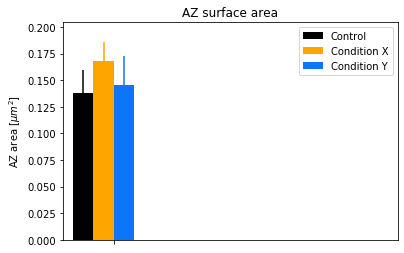

In [6]:
# Plot surface area of the active zone membrane (property 'az_surface_um', specified
# by argument name)

util.stats(
    data=near_sv, name='az_surface_um', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='t', reference=reference, 
    y_label=r'AZ area [${\mu}m^2$]', title='AZ surface area')

As in most of the other cases, mean, standard deviation, standard error of the mean and the number of data points are shown for each group in a table directly above the graph.

#### 2) Indexed properties

Each data structure contains info about multiple biological structures of the same type, such as vesicles, tethers, or connectors. Each biological structure is assigned a unique id. Indexed properties are those that have one value per each biological structure. For example, vesicle radius, tether length and the number of connectors per vesicle are all indexed properties. 

In [7]:
# Show indexed property values in Pandas.DataFrame form

# Properties of only one experiment are shown in order to make the pesentation more clear
df = tether.get_indexed_data()
df[df['identifiers'] == 'ctrl_209']

,group,identifiers,ids,boundaries,boundaryDistance,boundaryDistance_nm,distance,distance_nm,length,length_nm,surface,thresh,volume
0,ctrl,ctrl_209,100,"[2, 23]",3.000000,5.268000,3.811235,6.692529,4.741657,8.326350,125.0,-808.0,125.0
1,ctrl,ctrl_209,126,"[2, 23]",3.000000,5.268000,3.590214,6.304415,10.729931,18.841760,159.0,-781.0,161.0
2,ctrl,ctrl_209,208,"[2, 30]",3.000000,5.268000,4.749338,8.339838,12.452767,21.867058,269.0,-727.0,269.0
3,ctrl,ctrl_209,241,"[2, 22]",3.605551,6.331348,5.602052,9.837203,13.618571,23.914210,279.0,-700.0,281.0
4,ctrl,ctrl_209,242,"[2, 34]",3.000000,5.268000,1.813111,3.183823,3.000000,5.268000,13.0,-700.0,13.0
5,ctrl,ctrl_209,264,"[2, 23]",3.000000,5.268000,6.857308,12.041432,10.298326,18.083860,307.0,-673.0,308.0
6,ctrl,ctrl_209,269,"[2, 34]",3.000000,5.268000,5.863358,10.296056,35.706710,62.700983,539.0,-673.0,550.0
7,ctrl,ctrl_209,290,"[2, 23]",3.000000,5.268000,1.392388,2.445034,2.000000,3.512000,58.0,-646.0,59.0
8,ctrl,ctrl_209,291,"[2, 34]",3.000000,5.268000,3.347719,5.878595,8.324233,14.617353,75.0,-646.0,76.0
9,ctrl,ctrl_209,312,"[2, 29]",4.000000,7.024000,1.880266,3.301748,3.968119,6.968017,32.0,-619.0,32.0



Mean tether length
Identifier      mean       std       sem         n         h confidence 
      ctrl     14.00      9.02      0.38       555     0.0000    1.0000 
    cond_x     13.10      8.16      0.50       266     1.6161    0.2036 
    cond_y     20.89     12.65      1.17       117    46.5014    0.0000 


(<pyto.analysis.observations.Observations at 0x7f981ccc51c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981ccc54f0>)

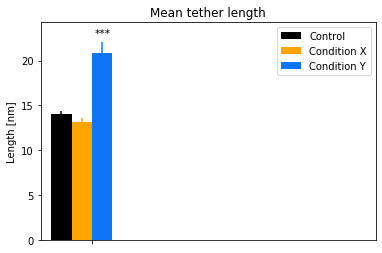

In [8]:
# Plot tether length (property 'length_nm', specified by argument name)

# Here the mean tether length of a group is calculated from all tethers of the group, 
# so all experiments of the group are pooled together. Note join='join'.

util.stats(
    data=tether, name='length_nm', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='kruskal', reference=reference,
    y_label='Length [nm]', title='Mean tether length')


Mean tether length
Identifier      mean       std       sem         n         h confidence 
      ctrl     13.50      1.90      0.51        14     0.0000    1.0000 
    cond_x     13.43      3.66      1.30         8     0.0047    0.9456 
    cond_y     23.42     11.44      3.30        12    15.6852    0.0001 


(<pyto.analysis.observations.Observations at 0x7f981cc0f460>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981cc0f070>)

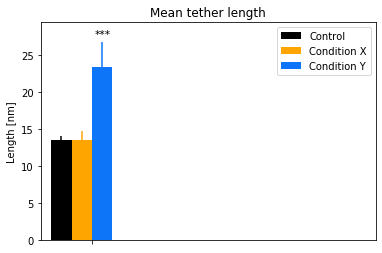

In [9]:
# Plot tether length (property 'length_nm')

# Here the mean tether length of a group is calculated from the mean tether lengths
# of all experiments belonging to the group. Note join='mean'.

util.stats(
    data=tether, name='length_nm', join='mean', pp=work, groups=categories, 
    identifiers=identifiers, test='kruskal', reference=reference,
    y_label='Length [nm]', title='Mean tether length')


Mean tether length
 Group  Identifier      mean       std       sem         n 
  ctrl    ctrl_108     15.72      9.99      0.78       163 
  ctrl    ctrl_109     14.75      8.02      1.25        41 
  ctrl    ctrl_110     12.34      8.63      1.60        29 
  ctrl    ctrl_114     14.28      9.55      2.76        12 
  ctrl    ctrl_202     14.83      9.95      2.28        19 
  ctrl    ctrl_204     12.45      8.00      1.19        45 
  ctrl    ctrl_206     12.38      5.79      1.14        26 
  ctrl    ctrl_209     17.08     15.88      4.59        12 
  ctrl    ctrl_327     12.15      8.47      1.22        48 
  ctrl    ctrl_328     11.51      7.69      1.32        34 
  ctrl    ctrl_329     11.78      7.32      1.20        37 
  ctrl    ctrl_330     10.98      9.87      2.21        20 
  ctrl    ctrl_421     15.96      7.97      1.02        61 
  ctrl    ctrl_428     12.84      6.19      2.19         8 
cond_x  cond_x_115      7.44      5.99      0.98        37 
cond_x  cond_x_121  

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


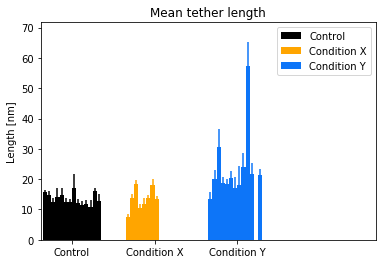

In [10]:
# Plot tether length (property 'length_nm')

# Mean values for all experiments are plotted.
# Note join='mean'.

res, ax = util.stats(
    data=tether, name='length_nm', join=None, pp=work, groups=categories, 
    identifiers=identifiers, test=None, reference=reference, label=None,
    y_label='Length [nm]', title='Mean tether length')

### Statistical significance

Argument test determines the statistical test used (None for no test)

Argument reference determines the statistical controls for each experimental group. For example:

In [11]:
reference['cond_y']

'ctrl'

shows that m13_dko group is compared with m13_ctrl group. 

The test is specified by argument test.

The value determined by the statistical test used and the confidence (probability that there is no difference between the two groups) are shown in the tables above the graphs.

The position and color of the confidence level stars, indicates which two groups were compared. For example, in the plot above, black stars above m13_dko shows the significant difference between m13_dko and m13_wt.

However, in the following example:


Mean tether length
Identifier      mean       std       sem         n         h confidence 
      ctrl     14.00      9.02      0.38       555     0.0000    1.0000 
    cond_x     13.10      8.16      0.50       266     1.6161    0.2036 
    cond_y     20.89     12.65      1.17       117    47.7942    0.0000 


(<pyto.analysis.observations.Observations at 0x7f981ca9bc40>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981ca9bb80>)

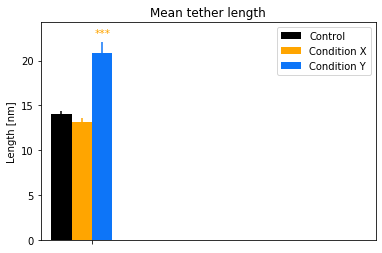

In [12]:
# Modified reference example

reference_local = {
    'ctrl': 'ctrl',
    'cond_x': 'ctrl',
    'cond_y': 'cond_x'}
util.stats(
    data=tether, name='length_nm', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='kruskal', reference=reference_local,
    y_label='Length [nm]', title='Mean tether length')

the stars are orange, indicating statistical comparison between m13_dko and m13_dhet groups. 

### Common plotting function arguments

* data: data structures that contains the analyzed data
* name: name of the property that is analyzed, these are the same as the labels (column names) of the Pandas data frames shown above 
* pp: module that contains printing and plotting parameters (set to work)
* groups: names of experimental groups that are analyzed
* identifiers: identifiers of experiments that are analyzed

Arguments groups and identifiers can be selected to show only a subset of data (compare the graph directly below, with the AZ surface area graph shown above):


AZ surface area (subset of data)
Identifier      mean       std       sem         n         t confidence 
      ctrl      0.14      0.11      0.05         6     0.0000    1.0000 
    cond_y      0.11      0.08      0.04         5    -0.6148    0.5539 


(<pyto.analysis.observations.Observations at 0x7f981ca9b220>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981ca9b640>)

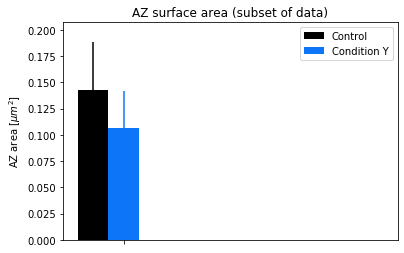

In [13]:
# Plot surface area of the active zone membrane for a subset of data

categories_local = ['ctrl', 'cond_y']
identifiers_local = [
    'ctrl_108', 'ctrl_109', 'ctrl_110', 'ctrl_114',
    'ctrl_202', 'ctrl_204',
    'cond_y_102', 'cond_y_103', 'cond_y_104', 'cond_y_105',
    'cond_y_211']
util.stats(
    data=near_sv, name='az_surface_um', join='join', pp=work, groups=categories_local, 
    identifiers=identifiers_local, test='t', reference=reference, 
    y_label=r'AZ area [${\mu}m^2$]', title='AZ surface area (subset of data)')

### Histograms


Tether length histogram
Identifier         n      chi2 confidence 
      ctrl       555     0.0000    1.0000 
    cond_x       266     4.6758    0.3222 
    cond_y       117    54.7473    0.0000 


/home/vladan/tools/pyto_dev/pyto/analysis/observations.py:1412: RuntimeWarning: invalid value encountered in true_divide
  prob = his / float(his.sum())


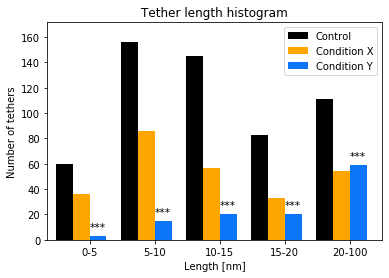

In [14]:
# Tether length histogram, show the number of events in each bin.

# Plotting histograms requires arguments bins and bin-names. Argument 
# plot_name='histogram' is needed to show the number of events. 

# The stars show that the distribution of tether lengths is significantly
# different between m13_dko and m13_wt groups. This cannot be interpreted 
# to say anything about the differences within individual bins.

bins = list(range(0,21,5)) + [100]
bin_names = ['{}-{}'.format(x, y) for x, y in zip(bins[:-1], bins[1:])]
util.stats(
    data=tether, name='length_nm', bins=bins, 
    bin_names=bin_names, join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='chi2', reference=reference,
    plot_name='histogram', y_label='Number of tethers', 
    x_label='Length [nm]', title='Tether length histogram');


Tether length histogram
Identifier         n      chi2 confidence 
      ctrl       555     0.0000    1.0000 
    cond_x       266     4.6758    0.3222 
    cond_y       117    54.7473    0.0000 


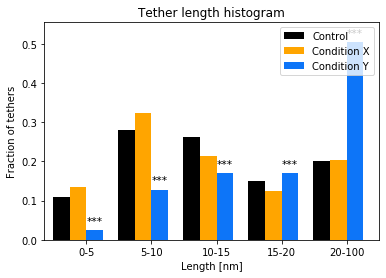

In [15]:
# Tether length histogram, show probabilities.

# The same as previous, except that in order to show the probability
# (fraction) that a vesicle falls in a bin, argument 
# plot_name='probability' is needed. 

# The statistical difference is calculated based on the number of 
# vesicles in each bin (like in the previous example).

bins = list(range(0,21,5)) + [100]
bin_names = ['{}-{}'.format(x, y) for x, y in zip(bins[:-1], bins[1:])]
util.stats(
    data=tether, name='length_nm', bins=bins, 
    bin_names=bin_names, join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='chi2', reference=reference,
    plot_name='probability', y_label='Fraction of tethers', 
    x_label='Length [nm]', title='Tether length histogram');

### Adjusting plots


Mean tether length
Identifier      mean       std       sem         n         h confidence 
      ctrl     14.00      9.02      0.38       555     0.0000    1.0000 
    cond_x     13.10      8.16      0.50       266     1.6161    0.2036 
    cond_y     20.89     12.65      1.17       117    46.5014    0.0000 


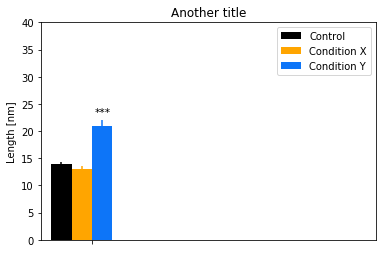

In [16]:
# Example of changing plot appearance

res, ax = util.stats(
    data=tether, name='length_nm', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='kruskal', reference=reference,
    y_label='Length [nm]', title='Mean tether length')

# plot parameters are set here
ax.set_ylim(0, 40)
ax.set_title('Another title');


Mean tether length
Identifier      mean       std       sem         n         h confidence 
      ctrl     14.00      9.02      0.38       555     0.0000    1.0000 
    cond_x     13.10      8.16      0.50       266     1.6161    0.2036 
    cond_y     20.89     12.65      1.17       117    46.5014    0.0000 


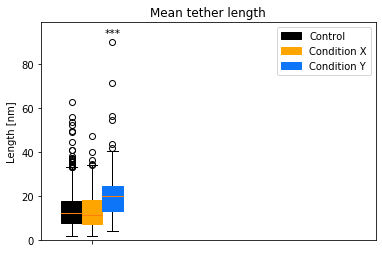

In [17]:
# Box plots

# Most other plot types can be represented as box plots

res, ax = util.stats(
    data=tether, name='length_nm', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='kruskal', reference=reference,
    plot_type='boxplot', y_label='Length [nm]', title='Mean tether length')

### Presentation figures

What follows is a procedure to make and save a figure / presentation style plot.

In [18]:
# Switch to external plots and use a larger font

# for some reason need to repeat
%matplotlib
plt.rcParams['font.size'] = 16  
%matplotlib
plt.rcParams['font.size'] = 16

Using matplotlib backend: TkAgg
Using matplotlib backend: TkAgg


In [19]:
# Plot in an external window
#
# Do not close the external plot window 

res, ax = util.stats(
    data=tether, name='length_nm', join='mean', pp=work, groups=categories, 
    identifiers=identifiers, test='kruskal', reference=reference,
    y_label='Length [nm]', title='Mean tether length')


Mean tether length
Identifier      mean       std       sem         n         h confidence 
      ctrl     13.50      1.90      0.51        14     0.0000    1.0000 
    cond_x     13.43      3.66      1.30         8     0.0047    0.9456 
    cond_y     23.42     11.44      3.30        12    15.6852    0.0001 


In [20]:
# Adjust the plot (if needed)
#
# Do not close the external plot window 

ax.set_xlabel('Nothing really');

In [21]:
# Save the plot
#
# Close the external plot window only after this command.

plt.savefig('plot.eps')

WARNING backend_ps._is_transparent():803 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
WARNING backend_ps._is_transparent():803 The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [22]:
# Return to plotting inline (in the notebook)

%matplotlib inline

## Analysis examples

In this section, the most often used plots are shown. 

A more comprehensive set of analysis functions are in work.py script.

### Vesicle distribution

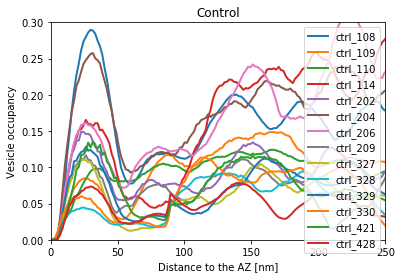

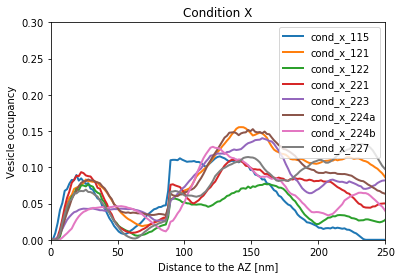

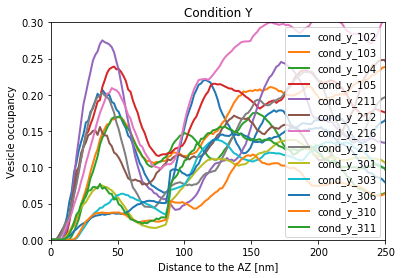

In [23]:
# Vesicle distribution dependence on the distance to the active zone, 
# individual datasets.

# Vesicle ocoupancy at a given distance to the active zone membrane is
# defined as the fraction of the layer located at the given distance that is
# occupied by vesicles. A layer contains citosol and vesicles, but not other
# organeles or cellular structures such as mitochondria, or microtubules.

util.plot_layers(
    data=layer, mode='all', pp=work, groups=categories, identifiers=identifiers)

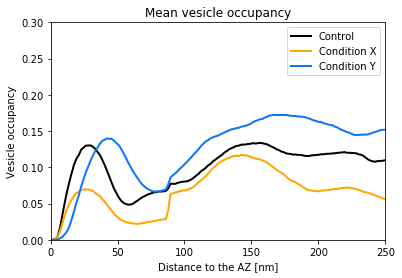

In [24]:
# Vesicle distribution dependence on the distance to the active zone, 
# group means.

util.plot_layers(
    data=layer, mode='mean', pp=work, groups=categories, 
    identifiers=identifiers, title="Mean vesicle occupancy")


SV occupancy
       Group Identifier      mean       std       sem         n         t confidence         t confidence 
    proximal       ctrl      0.09      0.05      0.01        14     0.0000    1.0000     0.0000    1.0000 
    proximal     cond_x      0.05      0.01      0.00         8    -2.3637    0.0283     0.0000    1.0000 
    proximal     cond_y      0.08      0.05      0.01        13    -0.7035    0.4883     0.0000    1.0000 
intermediate       ctrl      0.06      0.03      0.01        14     0.0000    1.0000    -2.2990    0.0298 
intermediate     cond_x      0.03      0.01      0.00         8    -2.6948    0.0139    -4.2020    0.0009 
intermediate     cond_y      0.10      0.05      0.02        13     2.4132    0.0235     0.9382    0.3575 
    distal_1       ctrl      0.10      0.04      0.01        14     0.0000    1.0000     0.3571    0.7239 
    distal_1     cond_x      0.08      0.02      0.01         8    -1.4406    0.1652     3.4684    0.0038 
    distal_1     cond_y

({'proximal': <pyto.analysis.observations.Observations at 0x7f981efc1e50>,
  'intermediate': <pyto.analysis.observations.Observations at 0x7f981b5f1310>,
  'distal_1': <pyto.analysis.observations.Observations at 0x7f981b48d100>,
  'distal_2': <pyto.analysis.observations.Observations at 0x7f981b6099d0>},
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981efc1d90>)

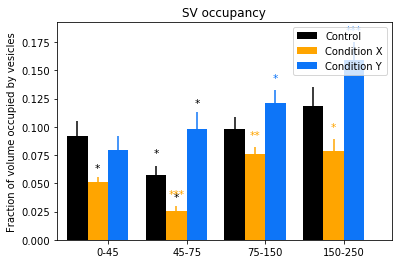

In [25]:
# Vesicle occupancy per distance zones.

# The zones are proximal (0-45 nm), intermediate (45-75 nm) and two distal 
# (75-150 and 150-250 nm).

# There are two types of ststistical comparisons here:
#   1) Between groups within a zone, the same as explained before
#   2) Between zones of the same condition (reference zone is proximal),
#   the stars showing this significance have the same color as the bars
#   below them.

util.analyze_occupancy(
        layer=layer, bins=distance_bins, bin_names=distance_bin_names, 
        pixel_size=catalog.pixel_size, pp=work, groups=categories, 
        identifiers=identifiers, test='t', reference=reference, ddof=1, 
        out=sys.stdout, outNames=None, yerr='sem', confidence='stars', 
        title='SV occupancy', y_label='Fraction of volume occupied by vesicles')

### Active zone and the proximal vesicles


Number of proximal vesicles per unit ($1 {\mu}m^2$) AZ area
Identifier      mean       std       sem         n         t confidence 
      ctrl     92.99     30.34      8.11        14     0.0000    1.0000 
    cond_x     60.18     14.25      5.04         8    -2.8611    0.0097 
    cond_y     65.57     42.26     11.72        13    -1.9479    0.0627 


(<pyto.analysis.observations.Observations at 0x7f981b61d940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981b61de80>)

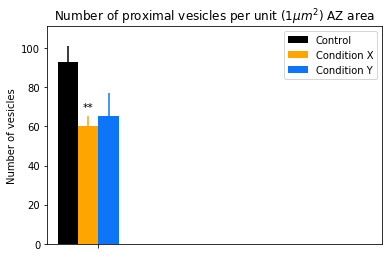

In [26]:
# Number of proximal vesicles per unit surface area of the
# active zone membrane

util.stats(
    data=near_sv, name='vesicle_per_area_um', join='join', 
    pp=work, groups=categories, identifiers=identifiers, test='t', 
    reference=reference, y_label='Number of vesicles', 
    title=r'Number of proximal vesicles per unit ($1 {\mu}m^2$) AZ area')


Number of proximal vesicles per synapse
Identifier      mean       std       sem         n         t confidence 
      ctrl     13.00     11.00      2.94        14     0.0000    1.0000 
    cond_x     10.00      3.38      1.20         8    -0.7443    0.4653 
    cond_y      7.54      3.97      1.10        13    -1.6884    0.1038 


(<pyto.analysis.observations.Observations at 0x7f981c84a2b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981c84a250>)

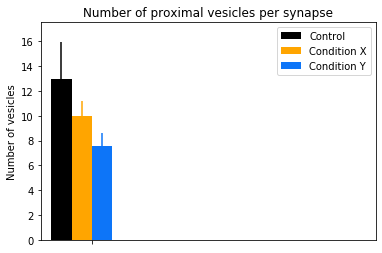

In [27]:
# Number or proximal vesicles per synapse

util.stats(
    data=near_sv, name='n_vesicle', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='t', reference=reference, 
    y_label='Number of vesicles', title='Number of proximal vesicles per synapse')


Distance of proximal svs to the AZ
Identifier      mean       std       sem         n         t confidence 
      ctrl      8.32      4.29      0.32       182     0.0000    1.0000 
    cond_x      8.45      5.44      0.61        80     0.2120    0.8323 
    cond_y     14.33      4.28      0.43        98    11.1948    0.0000 


(<pyto.analysis.observations.Observations at 0x7f981c8aae50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981c8aab20>)

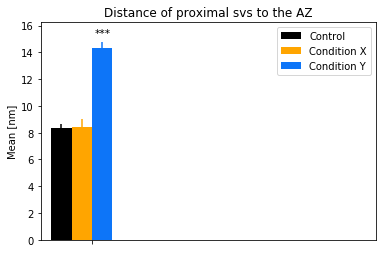

In [28]:
# Proximal vesicle distance to the active zone

util.stats(
    data=near_sv, name='minDistance_nm', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='t', reference=reference,
    ddof=1, out=sys.stdout, y_label='Mean [nm]',
    title='Distance of proximal svs to the AZ')


Distance of proximal svs to the AZ
Identifier         n 
      ctrl       182 
    cond_x        80 
    cond_y        98 


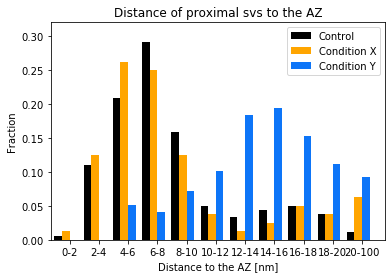

In [29]:
# Histogram of proximal vesicle distances to the active zone 

bins = list(range(0,21,2)) + [100]
bin_names = ['{}-{}'.format(x, y) for x, y in zip(bins[:-1], bins[1:])]
util.stats(
    data=near_sv, name='minDistance_nm', join='join', pp=work, 
    bins=bins, bin_names=bin_names, plot_name='probability', 
    groups=categories, identifiers=identifiers, test=None, reference=reference,
    ddof=1, out=sys.stdout, y_label='Fraction', x_label="Distance to the AZ [nm]",
    title='Distance of proximal svs to the AZ');


SVs 0-5 nm to the AZ
Identifier      mean       std       sem         n         h confidence 
      ctrl      0.23      0.22      0.06        14     0.0000    1.0000 
    cond_x      0.26      0.37      0.13         8     0.5248    0.4688 
    cond_y      0.04      0.09      0.02        13    10.1903    0.0014 


(<pyto.analysis.observations.Observations at 0x7f981ef986a0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981ef982b0>)

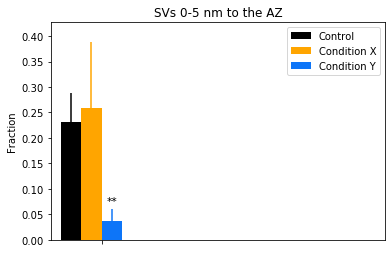

In [30]:
# Fraction of proximal vecles located 0-5 nm to the active zone membrane.

# Argument fraction determines the bin defined by arg bins. In this case,
# fraction=0 refers to the 0th bin of the argument bins. To
# analyze the 2nd bin (10-20) for example, set fraction=2. 

# For statistical analysis, the fraction of all proximal vesicles located 
# at 0-5 nm distance is obtained for each synapse, and these fractions
# are statistically compared between experimental groups. The test
# used is non-parametrical (Kruskal).

bins = [0, 5, 10, 20, 100]
fraction = 0  
bin_names = ['{}-{}'.format(x, y) for x, y in zip(bins[:-1], bins[1:])]
util.stats(
    data=near_sv, name='minDistance_nm', join='mean_bin', fraction=fraction, pp=work, 
    bins=bins, bin_names=bin_names, plot_name=None, 
    groups=categories, identifiers=identifiers, test='kruskal', reference=reference,
    ddof=1, out=sys.stdout, y_label='Fraction', 
    title='SVs {} nm to the AZ'.format(bin_names[fraction]))

#### A more complicated example


Distance of proximal svs to the AZ
Identifier         n      chi2 confidence 
      ctrl       182     0.0000    1.0000 
    cond_x        80     0.0000    0.9961 
    cond_y        98    96.6912    0.0000 


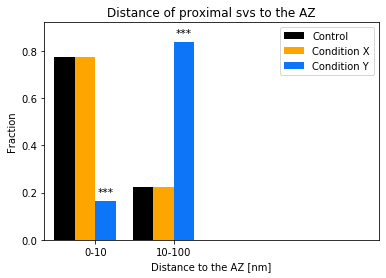

In [31]:
# The same type of graph as shown few graphs above

# Histogram of proximal vesicle distances to the active zone 
# with only two bins: 0-10 and 10-100 nm.

# Histogams are made by pooling data of all xperiments within experimental groups.

bins = [0, 10, 100]
bin_names = ['{}-{}'.format(x, y) for x, y in zip(bins[:-1], bins[1:])]
util.stats(
    data=near_sv, name='minDistance_nm', join='join', pp=work, 
    bins=bins, bin_names=bin_names, plot_name='probability', 
    groups=categories, identifiers=identifiers, test='chi2', reference=reference,
    ddof=1, out=sys.stdout, y_label='Fraction', x_label="Distance to the AZ [nm]",
    title='Distance of proximal svs to the AZ');


SVs 0-10 nm to the AZ
Identifier      mean       std       sem         n         h confidence 
      ctrl      0.80      0.15      0.04        14     0.0000    1.0000 
    cond_x      0.76      0.21      0.07         8     0.4693    0.4933 
    cond_y      0.16      0.14      0.04        13    19.1205    0.0000 


(<pyto.analysis.observations.Observations at 0x7f981cb6e760>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981cb6e7c0>)

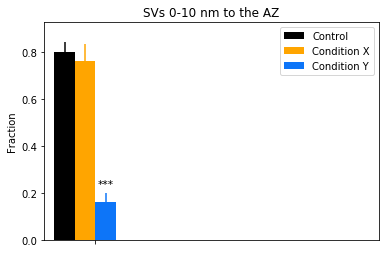

In [32]:
# The same type of graph as shown few graphs above

# Fraction of proximal vecles located 0-5 nm to the active zone membrane.

# Argument fraction determines the bin defined by arg bins. In this case,
# fraction=0 refers to the 0th bin of the argument bins. To
# analyze the 2nd bin (10-20) for example, set fraction=2. 

# For statistical analysis, the fraction of all proximal vesicles located 
# at 0-5 nm distance is obtained for each synapse, and these fractions
# are statistically compared between experimental groups. The test
# used is non-parametrical (Kruskal).

bins = [0, 10, 100]
fraction = 0  
bin_names = ['{}-{}'.format(x, y) for x, y in zip(bins[:-1], bins[1:])]
util.stats(
    data=near_sv, name='minDistance_nm', join='mean_bin', fraction=fraction, pp=work, 
    bins=bins, bin_names=bin_names, plot_name=None, 
    groups=categories, identifiers=identifiers, test='kruskal', reference=reference,
    ddof=1, out=sys.stdout, y_label='Fraction', 
    title='SVs {} nm to the AZ'.format(bin_names[fraction]))


Distance of proximal svs to the AZ
Identifier  fraction         n      chi2 confidence 
      ctrl     0.775       182     0.0000    1.0000 
    cond_x     0.775        80     0.0000    0.9961 
    cond_y     0.163        98    96.6912    0.0000 

Distance of proximal svs to the AZ (statistics for join='mean_bin', sem used for the graph)
Identifier      mean       std       sem         n         h confidence 
      ctrl      0.80      0.15      0.04        14     0.0000    1.0000 
    cond_x      0.76      0.21      0.07         8     0.4693    0.4933 
    cond_y      0.16      0.14      0.04        13    19.1205    0.0000 


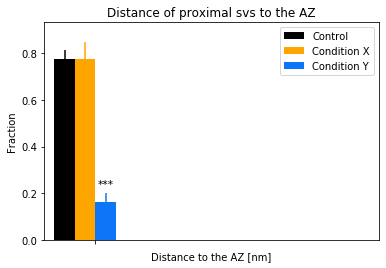

In [33]:
# This graph is the combination of the two previous graphs

# The bars are from all experiment values within a group 
# (like the second graph above).

# The error bars are from mean experimental values
# (like the graph above).

# Statistics from both of the above two graphs are shown. 

bins = [0, 10, 100]
bin_names = ['{}-{}'.format(x, y) for x, y in zip(bins[:-1], bins[1:])]
util.stats(
    data=near_sv, name='minDistance_nm', join='join', pp=work, 
    bins=bins, bin_names=bin_names, plot_name=None, fraction=0, 
    groups=categories, identifiers=identifiers, test='chi2', 
    test_mean='kruskal', reference=reference,
    ddof=1, out=sys.stdout, y_label='Fraction', x_label="Distance to the AZ [nm]",
    title='Distance of proximal svs to the AZ');

### Tethers


Mean tether length
Identifier      mean       std       sem         n         h confidence 
      ctrl     14.00      9.02      0.38       555     0.0000    1.0000 
    cond_x     13.10      8.16      0.50       266     1.6161    0.2036 
    cond_y     20.89     12.65      1.17       117    46.5014    0.0000 


(<pyto.analysis.observations.Observations at 0x7f9819be4a60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9819be4e20>)

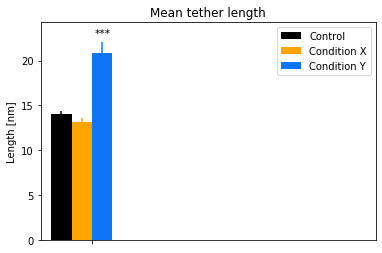

In [34]:
# Tether length

util.stats(
    data=tether, name='length_nm', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='kruskal', reference=reference,
    y_label='Length [nm]', title='Mean tether length')


Tether length histogram
Identifier         n 
      ctrl       555 
    cond_x       266 
    cond_y       117 


/home/vladan/tools/pyto_dev/pyto/analysis/observations.py:1412: RuntimeWarning: invalid value encountered in true_divide
  prob = his / float(his.sum())


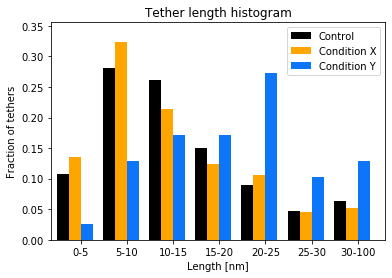

In [35]:
# Tether length histogram

bins = list(range(0,31,5)) + [100]
bin_names = ['{}-{}'.format(x, y) for x, y in zip(bins[:-1], bins[1:])]
util.stats(
    data=tether, name='length_nm', bins=bins, 
    bin_names=bin_names, join='join', pp=work, groups=categories, 
    identifiers=identifiers, test=None, reference=reference,
    plot_name='probability', y_label='Fraction of tethers', 
    x_label='Length [nm]', title='Tether length histogram');

### Tethers and vesicles


Fraction of proximal vesicles that are tethered
Identifier  fraction         n      chi2 confidence 
      ctrl     0.841       182     0.0000    1.0000 
    cond_x     0.850        80     0.0367    0.8480 
    cond_y     0.571        98    24.3950    0.0000 

Fraction of proximal vesicles that are tethered (statistics for join='mean_bin', sem used for the graph)
Identifier      mean       std       sem         n         h confidence 
      ctrl      0.81      0.15      0.04        14     0.0000    1.0000 
    cond_x      0.85      0.10      0.04         8     0.1420    0.7063 
    cond_y      0.56      0.28      0.08        13     6.2608    0.0123 


(<pyto.analysis.observations.Observations at 0x7f981b492e80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981b41f970>)

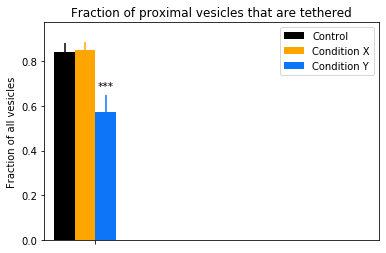

In [36]:
# Fraction of proximal vesicles that are tethered 

util.stats(
    data=near_sv, name='n_tether', join='join', bins=[0,1,100], pp=work, 
    fraction=1, groups=categories, identifiers=identifiers, test='chi2', 
    reference=reference, y_label='Fraction of all vesicles',
    title='Fraction of proximal vesicles that are tethered')


N tethers per proximal sv
Identifier      mean       std       sem         n         h confidence 
      ctrl      3.05      2.52      0.19       182     0.0000    1.0000 
    cond_x      3.29      2.42      0.27        80     0.8259    0.3635 
    cond_y      1.10      1.28      0.13        98    49.8629    0.0000 


(<pyto.analysis.observations.Observations at 0x7f9819be92b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981c91aa60>)

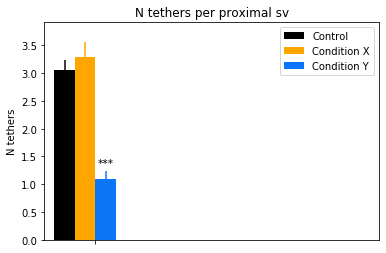

In [37]:
# Number of tethers per proximal vesicle

util.stats(
    data=near_sv, name='n_tether', join='join', pp=work, groups=categories, 
    identifiers=identifiers, reference=reference, test='kruskal', 
    title='N tethers per proximal sv', y_label='N tethers') 


### Connectors


Mean connector length
Identifier      mean       std       sem         n         t confidence 
      ctrl     17.61      9.05      0.13      4555     0.0000    1.0000 
    cond_x     15.75      8.58      0.17      2625    -8.5590    0.0000 
    cond_y     17.08      8.83      0.09      9132    -3.2762    0.0011 


(<pyto.analysis.observations.Observations at 0x7f981cbf0760>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981cad1f40>)

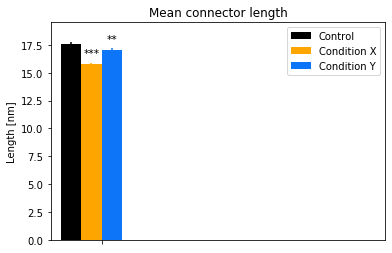

In [38]:
# Connector length (all connectors)

util.stats(
    data=conn, name='length_nm', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='t', reference=reference,

    y_label='Length [nm]', title='Mean connector length')


Mean proximal connector length
Identifier      mean       std       sem         n         t confidence 
      ctrl     14.59      8.72      0.35       630     0.0000    1.0000 
    cond_x     12.86      9.21      0.58       253    -2.6296    0.0087 
    cond_y     16.05     10.31      0.55       356     2.3586    0.0185 


(<pyto.analysis.observations.Observations at 0x7f981c9076d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9819bda820>)

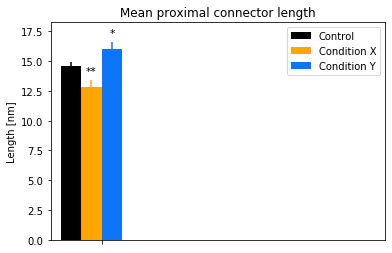

In [39]:
# Proximal connector length

util.stats(
    data=conn.extractByVesicles(
        vesicles=near_sv, categories=categories)[0], 
    name='length_nm', join='join', pp=work, groups=categories, 
    identifiers=identifiers, test='t', reference=reference,
    y_label='Length [nm]', title='Mean proximal connector length')


Mean connector length dependence on distance zone
       Group Identifier      mean       std       sem         n         t confidence         t confidence 
    proximal       ctrl     13.49      7.59      0.33       525     0.0000    1.0000     0.0000    1.0000 
    proximal     cond_x     11.59      8.18      0.57       208    -2.9919    0.0029     0.0000    1.0000 
    proximal     cond_y     15.78      8.93      0.65       190     3.3852    0.0008     0.0000    1.0000 
intermediate       ctrl     19.94     11.42      0.81       199     0.0000    1.0000     8.7981    0.0000 
intermediate     cond_x     14.90     10.57      1.14        86    -3.4979    0.0005     2.8902    0.0041 
intermediate     cond_y     16.41     11.26      0.62       330    -3.4816    0.0005     0.6620    0.5083 
    distal_1       ctrl     18.61      9.24      0.28      1122     0.0000    1.0000    11.0613    0.0000 
    distal_1     cond_x     16.66      8.91      0.33       747    -4.5441    0.0000     7.37

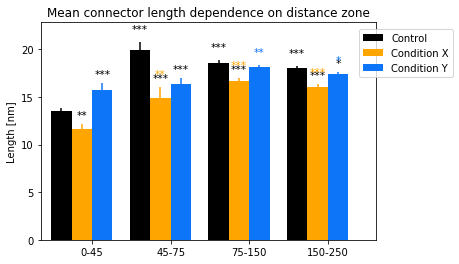

In [40]:
# Connector length per distance (to the active zone membrane) zones 

# Note that util.stats_list() function is used here, because the argument 
# data is a list of srtucture objects, as opposed to a single structre 
# object passed to util.stats() function. Otherwise these two functions 
# are very similar.

res, ax = util.stats_list(
    data=conn.splitByDistance(distance=distance_bins),
    dataNames=distance_bin_names, name='length_nm', join='join',
    pp=work, groups=categories, identifiers=identifiers, test='t',
    reference=reference, y_label='Length [nm]',
    title='Mean connector length dependence on distance zone')
print('out')
print(ax.get_legend_handles_labels())
ax.legend(loc=[0.95, 0.75])
#ax.get_legend_handles_labels()

### Connectors and vesicles


Fraction of proximal vesicles that are connected
Identifier  fraction         n      chi2 confidence 
      ctrl     0.885       182     0.0000    1.0000 
    cond_x     0.963        80     4.0511    0.0441 
    cond_y     0.878        98     0.0306    0.8612 

Fraction of proximal vesicles that are connected (statistics for join='mean_bin', sem used for the graph)
Identifier      mean       std       sem         n         h confidence 
      ctrl      0.84      0.16      0.04        14     0.0000    1.0000 
    cond_x      0.96      0.06      0.02         8     3.9769    0.0461 
    cond_y      0.86      0.14      0.04        13     0.1733    0.6772 


(<pyto.analysis.observations.Observations at 0x7f981b552fa0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981b515fa0>)

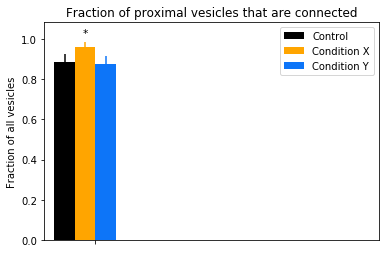

In [41]:
# Fraction of proximal vesicles that are connected

util.stats(
    data=near_sv, name='n_connection', join='join', bins=[0,1,100], 
    fraction=1, pp=work, groups=categories, identifiers=identifiers, test='chi2', 
    reference=reference, y_label='Fraction of all vesicles',
    title='Fraction of proximal vesicles that are connected')


Fraction of connected svs
       Group Identifier  fraction         n      chi2 confidence      chi2 confidence 
    proximal       ctrl     0.885       182     0.0000    1.0000     0.0000    1.0000 
    proximal     cond_x     0.963        80     4.0511    0.0441     0.0000    1.0000 
    proximal     cond_y     0.878        98     0.0306    0.8612     0.0000    1.0000 
intermediate       ctrl     0.867        75     0.0000    1.0000     0.1613    0.6880 
intermediate     cond_x     0.806        36     0.7004    0.4026     7.7631    0.0053 
intermediate     cond_y     0.923       104     1.5331    0.2157     1.1723    0.2789 
    distal_1       ctrl     0.916       439     0.0000    1.0000     1.4698    0.2254 
    distal_1     cond_x     0.951       247     3.0372    0.0814     0.1696    0.6805 
    distal_1     cond_y     0.960       399     6.8870    0.0087    10.0355    0.0015 
    distal_2       ctrl     0.921       668     0.0000    1.0000     2.3379    0.1263 
    distal_2    

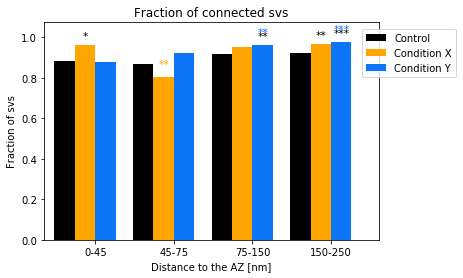

In [42]:
# Fraction of connected vesicles for distance zones 

res, ax = util.stats_list(
        data=sv_bins, dataNames=distance_bin_names,  pp=work, groups=categories,
        identifiers=identifiers, name='n_connection', bins=[0,1,100],
        join='join', test='chi2', reference=reference,
        x_label=distance_bins_label, y_label='Fraction of svs',
        title='Fraction of connected svs')
ax.legend(loc=[0.95, 0.75])


N connectors per proximal vesicle
Identifier      mean       std       sem         n         h confidence 
      ctrl      6.19      5.10      0.38       182     0.0000    1.0000 
    cond_x      5.46      3.83      0.43        80     0.3149    0.5747 
    cond_y      5.02      4.17      0.42        98     2.2862    0.1305 


(<pyto.analysis.observations.Observations at 0x7f9819a79a30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9819a79b50>)

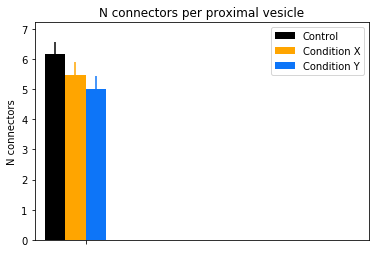

In [43]:
# Number of connectors per proximal vesicle

util.stats(
    data=near_sv, name='n_connection', join='join', pp=work, groups=categories,
    identifiers=identifiers, reference=reference, test='kruskal', 
    y_label='N connectors', title='N connectors per proximal vesicle')

### Tethers and connectors


Tethering and connectivity of proximal vesicles
Group Identifier  fraction     count         n      chi2 confidence 
  t_c       ctrl     0.753       137       182     0.0000    1.0000 
  t_c     cond_x     0.812        65        80     2.2707    0.3213 
  t_c     cond_y     0.520        51        98    24.4907    0.0000 
 t_nc       ctrl     0.088        16       182     0.0000    1.0000 
 t_nc     cond_x     0.037         3        80     2.2707    0.3213 
 t_nc     cond_y     0.051         5        98    24.4907    0.0000 
 nt_c       ctrl     0.132        24       182     0.0000    1.0000 
 nt_c     cond_x     0.150        12        80     2.2707    0.3213 
 nt_c     cond_y     0.357        35        98    24.4907    0.0000 
nt_nc       ctrl     0.027         5       182     0.0000    1.0000 
nt_nc     cond_x     0.000         0        80     2.2707    0.3213 
nt_nc     cond_y     0.071         7        98    24.4907    0.0000 


({'t_c': <pyto.analysis.observations.Observations at 0x7f9819aadfa0>,
  't_nc': <pyto.analysis.observations.Observations at 0x7f9819aadb80>,
  'nt_c': <pyto.analysis.observations.Observations at 0x7f9819aad430>,
  'nt_nc': <pyto.analysis.observations.Observations at 0x7f9819aad250>},
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9819a52160>)

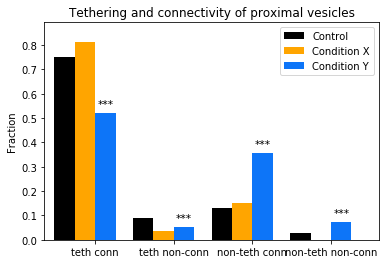

In [44]:
# Fraction of proximal vesicles that are:
#   - tethered and connected
#   - tethered and not connected
#   - not tethered and connected
#   - neither tethered nor connected

util.count_histogram(
    data=[near_teth_conn_sv, near_teth_non_conn_sv,
          near_non_teth_conn_sv, near_non_teth_non_conn_sv], 
    dataNames=['t_c', 't_nc', 'nt_c', 'nt_nc'], pp=work, groups=categories, 
    identifiers=identifiers, test='chi2', reference=reference, 
    label='experiment', plot_name='fraction', y_label='Fraction', 
    title='Tethering and connectivity of proximal vesicles')

### Vesicle size


Proximal vesicle radius
Identifier      mean       std       sem         n         t confidence 
      ctrl     21.72      2.17      0.16       182     0.0000    1.0000 
    cond_x     21.44      2.53      0.28        80    -0.9237    0.3565 
    cond_y     22.94      2.12      0.21        98     4.4896    0.0000 


(<pyto.analysis.observations.Observations at 0x7f981998cc10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9819a5dfa0>)

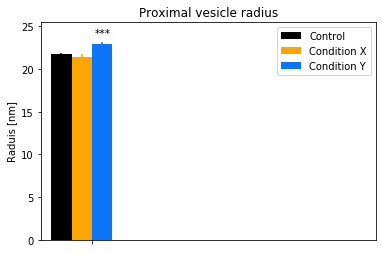

In [45]:
# Radius of proximal vesicles

util.stats(
    data=near_sv, name='radius_nm', join='join', pp=work, groups=categories,
    identifiers=identifiers, reference=reference, test='t', 
    y_label='Raduis [nm]', title='Proximal vesicle radius')

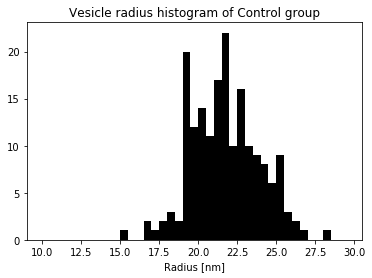

In [46]:
# Proximal vesicle radius histogram of m13_ctrl group

categories_local = ['ctrl']
util.plot_histogram(
    data=near_sv, name='radius_nm', bins=radius_bins, pp=work, 
    groups=categories_local, identifiers=identifiers, x_label='Radius [nm]',
    title='Vesicle radius histogram of Control group')

### Vesicle greyscale density


Lumenal density comparison between proximal tethered and non-tethered
       Group Identifier      mean       std       sem         n     t_rel confidence 
non_tethered       ctrl     1603.62     1221.05     352.49        12     0.6093    0.5547 
non_tethered     cond_x     1776.31     1353.08     552.39         6     0.6487    0.5452 
non_tethered     cond_y     2727.23     1286.72     371.45        12     1.6738    0.1223 
    tethered       ctrl     1525.54     1151.21     307.67        14        nan       nan 
    tethered     cond_x     1258.29     1551.41     548.51         8        nan       nan 
    tethered     cond_y     2325.58     1391.86     401.79        12        nan       nan 


/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/lib/python3/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


({'non_tethered': <pyto.analysis.observations.Observations at 0x7f981cb13f70>,
  'tethered': <pyto.analysis.observations.Observations at 0x7f98198ab7c0>},
 <matplotlib.axes._subplots.AxesSubplot at 0x7f981988b970>)

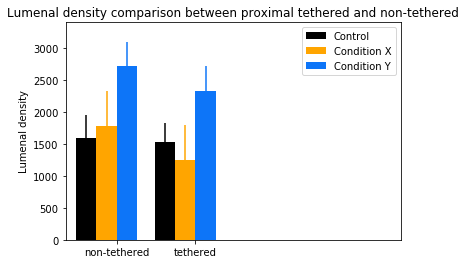

In [47]:
# Proximal vesicle lumen density comparison between tethered and non-tethered

util.stats_list_pair(
    data=[near_non_teth_sv, near_teth_sv],
    dataNames=['non_tethered', 'tethered'], name='lumen_density',
    pp=work, groups=categories, identifiers=identifiers,
    reference=reference, test='t_rel', label='experiment',
    y_label='Lumenal density',
    title=('Lumenal density comparison between proximal tethered and '
            + 'non-tethered'))



Lumenal - membrane density dependence on distance to the AZ
       Group Identifier      mean       std       sem         n         t confidence         t confidence 
    proximal       ctrl     289.65     133.87      9.92       182     0.0000    1.0000     0.0000    1.0000 
    proximal     cond_x     231.07     145.33     16.25        80    -3.1773    0.0017     0.0000    1.0000 
    proximal     cond_y     274.91     115.70     11.69        98    -0.9204    0.3582     0.0000    1.0000 
intermediate       ctrl     236.44     114.60     13.23        75     0.0000    1.0000    -3.0158    0.0028 
intermediate     cond_x     282.46     137.86     22.98        36     1.8518    0.0668     1.7897    0.0762 
intermediate     cond_y     285.07     125.21     12.28       104     2.6552    0.0087     0.5978    0.5506 
    distal_1       ctrl     236.88     114.51      5.47       439     0.0000    1.0000    -4.9682    0.0000 
    distal_1     cond_x     233.71     127.18      8.09       247    

({'proximal': <pyto.analysis.observations.Observations at 0x7f98197c2ca0>,
  'intermediate': <pyto.analysis.observations.Observations at 0x7f9819999af0>,
  'distal_1': <pyto.analysis.observations.Observations at 0x7f981996cfa0>,
  'distal_2': <pyto.analysis.observations.Observations at 0x7f9819870d60>},
 <matplotlib.axes._subplots.AxesSubplot at 0x7f98197c23a0>)

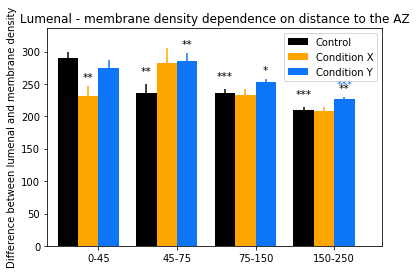

In [48]:
# Difference between lumenal and membrane density vs distance

util.stats_list(
    data=sv_bins, dataNames=distance_bin_names, name='lum_mem_density_diff',
    join='join', pp=work, groups=categories, identifiers=identifiers,
    reference=reference, test='t',
    y_label='Difference between lumenal and membrane density',
    title='Lumenal - membrane density dependence on distance to the AZ')